In [28]:
%pip install matplotlib

     ---------------------------------------- 7.5/7.5 MB 68.8 MB/s eta 0:00:00
     ------------------------------------- 470.4/470.4 kB 28.8 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 2.0/2.0 MB 121.7 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB ? eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 53.3 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
Note: you may need to restart the kernel to use updated packages.


In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [289]:
df = pd.read_csv("bank-full.csv", sep=";").dropna(axis=1, how='all')

In [290]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [291]:
df.shape

(45211, 17)

In [292]:
X_train, X_test, y_train, y_test = train_test_split(df, df['y'], test_size=0.5)

In [293]:
X_test[X_test['age'] >= 40].count()

age          10855
job          10855
marital      10855
education    10855
default      10855
balance      10855
housing      10855
loan         10855
contact      10855
day          10855
month        10855
duration     10855
campaign     10855
pdays        10855
previous     10855
poutcome     10855
y            10855
dtype: int64

In [301]:
scaler = MinMaxScaler()
df['credit_worthiness'] = df['balance'].astype(int)
print(df.credit_worthiness.unique())
df[['credit_worthiness']] = scaler.fit_transform(df[['credit_worthiness']])
df['credit_worthiness'] = df['credit_worthiness']*100

[ 2143    29     2 ...  8205 14204 16353]


In [302]:
df[df['credit_worthiness'] > 0.8]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,credit_worthiness
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,9.225936
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,7.306666
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,7.282153
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,8.647613
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,7.281245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,8.029343
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,8.850072
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,12.468905
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,7.886805


In [303]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,credit_worthiness
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,9.225936
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,7.306666
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,7.282153
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,8.647613
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,7.281245


Text(0, 0.5, 'Credit Worthiness')

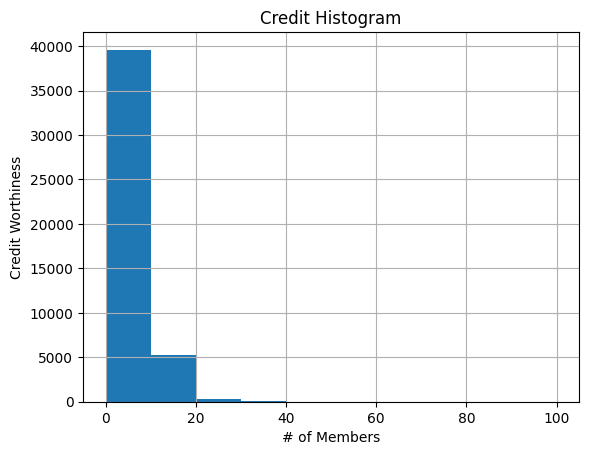

In [310]:
df['credit_worthiness'].hist()
plt.title("Credit Histogram")
plt.xlabel("# of Members")
plt.ylabel("Credit Worthiness")

In [317]:
df[(df['credit_worthiness'] >= 0.82) & (df['age'] < 40)].count().age

23361

In [311]:
thresholds = [threshold for threshold in range(0, 100)]
dictionary = {}
for threshold in thresholds:
    print('threshold: ', threshold)
    approved_loan_good_risk = df[(df['credit_worthiness'] >= threshold) & (df['loan'] == 'yes')].count().age
    approved_loan_bad_risk = df[(df['credit_worthiness'] < threshold) & (df['loan'] == 'yes')].count().age
    declined_loan_good_risk = df[(df['credit_worthiness'] >= threshold) & (df['loan'] == 'no')].count().age
    dictionary[threshold] = approved_loan_good_risk*10 - approved_loan_bad_risk*5 - declined_loan_good_risk*3

threshold:  0
threshold:  1
threshold:  2
threshold:  3
threshold:  4
threshold:  5
threshold:  6
threshold:  7
threshold:  8
threshold:  9
threshold:  10
threshold:  11
threshold:  12
threshold:  13
threshold:  14
threshold:  15
threshold:  16
threshold:  17
threshold:  18
threshold:  19
threshold:  20
threshold:  21
threshold:  22
threshold:  23
threshold:  24
threshold:  25
threshold:  26
threshold:  27
threshold:  28
threshold:  29
threshold:  30
threshold:  31
threshold:  32
threshold:  33
threshold:  34
threshold:  35
threshold:  36
threshold:  37
threshold:  38
threshold:  39
threshold:  40
threshold:  41
threshold:  42
threshold:  43
threshold:  44
threshold:  45
threshold:  46
threshold:  47
threshold:  48
threshold:  49
threshold:  50
threshold:  51
threshold:  52
threshold:  53
threshold:  54
threshold:  55
threshold:  56
threshold:  57
threshold:  58
threshold:  59
threshold:  60
threshold:  61
threshold:  62
threshold:  63
threshold:  64
threshold:  65
threshold:  66
thres

In [312]:
print(dictionary.values())

dict_values([-41461, -41476, -41491, -41491, -41488, -41542, -41887, -46597, -51838, -47359, -44326, -42334, -40666, -39901, -39166, -38530, -38089, -37705, -37342, -37156, -37033, -36919, -36823, -36727, -36685, -36643, -36607, -36553, -36511, -36439, -36421, -36421, -36391, -36361, -36349, -36340, -36331, -36322, -36316, -36325, -36319, -36304, -36295, -36289, -36286, -36283, -36274, -36271, -36265, -36256, -36256, -36256, -36256, -36256, -36271, -36265, -36259, -36259, -36259, -36256, -36253, -36247, -36244, -36244, -36244, -36244, -36241, -36241, -36235, -36235, -36235, -36235, -36232, -36232, -36232, -36232, -36232, -36232, -36232, -36232, -36232, -36232, -36226, -36226, -36226, -36226, -36226, -36226, -36226, -36226, -36226, -36226, -36226, -36226, -36226, -36226, -36226, -36223, -36223, -36223])


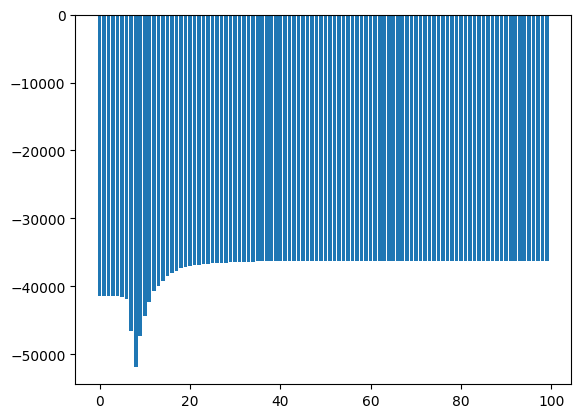

In [313]:
plt.bar(dictionary.keys(), dictionary.values())
plt.show()